In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model
from keras.utils import plot_model
import torch
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [2]:
mfcc = torch.load('Mfcc_feature.pt')

In [3]:
input=[]
for m in mfcc['mfcc']:
    norm=normalize(m,axis=1)
    input.append(norm)

In [4]:
input=np.asarray(input).transpose(0,2,1)

In [5]:
input[0].shape

(400, 13)

In [6]:
timesteps = 400
n_features = 13

In [28]:
model = Sequential()
model.add(Bidirectional(LSTM(10, activation='relu', input_shape=(timesteps,n_features), return_sequences=False)))
model.add(RepeatVector(timesteps))
model.add(LSTM(10, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
# model.summary()

In [29]:

hist=model.fit(input, input, epochs=300, verbose=1)

=====] - 0s 21ms/step - loss: 0.0025
Epoch 60/300
20/20 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 61/300
20/20 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 62/300
20/20 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 63/300
20/20 [==============================] - 0s 15ms/step - loss: 0.0025
Epoch 64/300
20/20 [==============================] - 0s 15ms/step - loss: 0.0025
Epoch 65/300
20/20 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 66/300
20/20 [==============================] - 0s 16ms/step - loss: 0.0025
Epoch 67/300
20/20 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 68/300
20/20 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 69/300
20/20 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 70/300
20/20 [==============================] - 0s 15ms/step - loss: 0.0025
Epoch 71/300
20/20 [==============================] - 0s 14ms

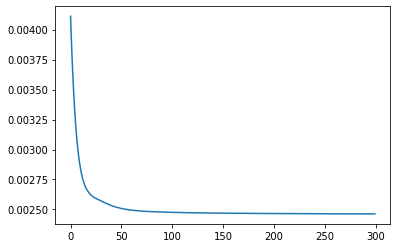

In [30]:

plt.plot(hist.history['loss'])

# Learning the Embedding

### just the encoder

In [33]:
from keras.models import Model
from keras.utils import plot_model
modelEnc = Model(inputs=model.inputs, outputs=model.layers[0].output)
modelEnc.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3_input (InputLay (None, 400, 13)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20)                1920      
Total params: 1,920
Trainable params: 1,920
Non-trainable params: 0
_________________________________________________________________


In [34]:
Embedding=modelEnc.predict(input[0][np.newaxis, :])

In [35]:
print('Embedding')
print(Embedding)

Embedding
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 6.1438721e-02 4.8216853e-02 3.2973543e-02 1.2662034e-02
  1.0890242e-04 1.3286400e-03 3.8085844e-02 3.7307430e-02 1.4051166e-01
  1.4295121e-01 1.5703378e-02 2.5930414e-01 4.2721890e-03 1.2990151e-08]]


In [2]:
import re
import numpy as np

def tokenize(text):
    # obtains tokens with a least 1 alphabet
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    word_to_id = dict()
    id_to_word = dict()

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

def generate_training_data(tokens, window_size):
    N = len(tokens)
    X, Y = [], []

    for i in range(N):
        nbr_inds = list(range(max(0, i - window_size), i)) + \
                   list(range(i + 1, min(N, i + window_size + 1)))
        for j in nbr_inds:
            X.append(tokens[i])
            Y.append(tokens[j])
            
    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=0)

    return X, Y


doc = "After the deduction of the costs of investing, " \
      "beating the stock market is a loser's game."
tokens = tokenize(doc)

X, Y = generate_training_data(tokens, 3)


In [3]:
X

array([['after', 'after', 'after', 'the', 'the', 'the', 'the',
        'deduction', 'deduction', 'deduction', 'deduction', 'deduction',
        'of', 'of', 'of', 'of', 'of', 'of', 'the', 'the', 'the', 'the',
        'the', 'the', 'costs', 'costs', 'costs', 'costs', 'costs',
        'costs', 'of', 'of', 'of', 'of', 'of', 'of', 'investing',
        'investing', 'investing', 'investing', 'investing', 'investing',
        'beating', 'beating', 'beating', 'beating', 'beating', 'beating',
        'the', 'the', 'the', 'the', 'the', 'the', 'stock', 'stock',
        'stock', 'stock', 'stock', 'stock', 'market', 'market', 'market',
        'market', 'market', 'market', 'is', 'is', 'is', 'is', 'is', 'is',
        'a', 'a', 'a', 'a', 'a', "loser's", "loser's", "loser's",
        "loser's", 'game', 'game', 'game']], dtype='<U9')

In [4]:
Y

array([['the', 'deduction', 'of', 'after', 'deduction', 'of', 'the',
        'after', 'the', 'of', 'the', 'costs', 'after', 'the',
        'deduction', 'the', 'costs', 'of', 'the', 'deduction', 'of',
        'costs', 'of', 'investing', 'deduction', 'of', 'the', 'of',
        'investing', 'beating', 'of', 'the', 'costs', 'investing',
        'beating', 'the', 'the', 'costs', 'of', 'beating', 'the',
        'stock', 'costs', 'of', 'investing', 'the', 'stock', 'market',
        'of', 'investing', 'beating', 'stock', 'market', 'is',
        'investing', 'beating', 'the', 'market', 'is', 'a', 'beating',
        'the', 'stock', 'is', 'a', "loser's", 'the', 'stock', 'market',
        'a', "loser's", 'game', 'stock', 'market', 'is', "loser's",
        'game', 'market', 'is', 'a', 'game', 'is', 'a', "loser's"]],
      dtype='<U9')